In [23]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

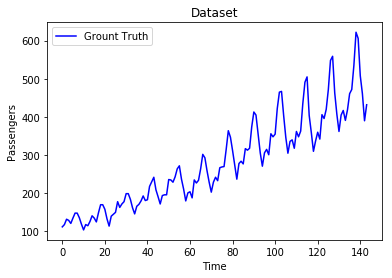

In [25]:
# load the dataset
path = "dataset/dataset.csv"
dataframe = read_csv(path, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

plt.plot(dataset, '-b')
plt.title("Dataset")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend(['Grount Truth'])
plt.show()

In [26]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [27]:
# split into train and test sets
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [28]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
              optimizer='adam'
              )
model.fit(trainX,
          trainY,
          epochs=100,
          batch_size=1,
          verbose=2
          )

Epoch 1/100
 - 1s - loss: 0.0221
Epoch 2/100
 - 0s - loss: 0.0098
Epoch 3/100
 - 0s - loss: 0.0071
Epoch 4/100
 - 0s - loss: 0.0067
Epoch 5/100
 - 0s - loss: 0.0063
Epoch 6/100
 - 0s - loss: 0.0060
Epoch 7/100
 - 0s - loss: 0.0056
Epoch 8/100
 - 0s - loss: 0.0053
Epoch 9/100
 - 0s - loss: 0.0049
Epoch 10/100
 - 0s - loss: 0.0045
Epoch 11/100
 - 0s - loss: 0.0040
Epoch 12/100
 - 0s - loss: 0.0036
Epoch 13/100
 - 0s - loss: 0.0033
Epoch 14/100
 - 0s - loss: 0.0030
Epoch 15/100
 - 0s - loss: 0.0029
Epoch 16/100
 - 0s - loss: 0.0027
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0025
Epoch 19/100
 - 0s - loss: 0.0024
Epoch 20/100
 - 0s - loss: 0.0024
Epoch 21/100
 - 0s - loss: 0.0023
Epoch 22/100
 - 0s - loss: 0.0023
Epoch 23/100
 - 0s - loss: 0.0023
Epoch 24/100
 - 0s - loss: 0.0023
Epoch 25/100
 - 0s - loss: 0.0023
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0023
Epoch 28/100
 - 0s - loss: 0.0022
Epoch 29/100
 - 0s - loss: 0.0022
Epoch 30/100
 - 0s - lo

In [31]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [32]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [33]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.85 RMSE
Test Score: 49.67 RMSE


In [34]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [35]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict

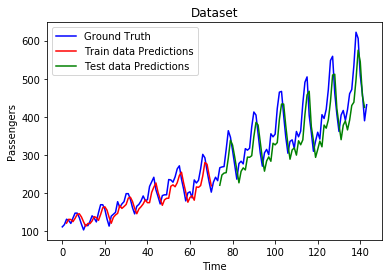

In [36]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),'-b', label='Ground Truth')
plt.plot(trainPredictPlot,'-r', label='Train data Predictions')
plt.plot(testPredictPlot,'-g', label='Test data Predictions')
plt.title("Dataset")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()